In [1]:
from IPython.display import display, clear_output
from ipywidgets import *
from IPython.display import Image, display, clear_output
import os
from time import sleep
from ipywidgets import FloatSlider
import sqlite3 as lite
import re
import shutil

### Prereqs

* You must have a directory with images, specify below as img_dir
* Images must have filenames with pmid, pmcid and fig_id separated by underscores and followed by '.jpeg'
* You must have the sqlite db created as well with a table fig_info(pmid, pmcid, fig_id, caption, url, fal_pos)

### Specify directories

In [2]:
# Path to directory with downloaded images
img_dir = '/Users/Ines/ipynbs/fig_info/'

In [3]:
# Path to sqlite db with image ids
db_name = '/Users/Ines/ipynbs/pk_figs.db'

### DB connection

In [4]:
conn = lite.connect(db_name)
cursor = conn.cursor()

### Files

In [5]:
file_list = [x for x in os.listdir(img_dir) if 'jpeg' in x]

In [6]:
n = len(file_list)

In [7]:
sorting_dict = {}

for file in enumerate(file_list):
    
    pmid = re.findall('^([0-9]*)_', file[1])[0]
    fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file[1])[0]
    cursor.execute("select fal_pos from fig_info where pmid = ? and fig_id = ?", (pmid, fig_id))
    result = cursor.fetchall()
    
    if result[0][0] == 1:
        sorting_dict[file[0]] = True
    elif result[0][0] == 0:
        sorting_dict[file[0]] = False
    else:
        sorting_dict[file[0]] = None

### Previous / Next

In [8]:
next_button = Button(description='next >', height='3em', width='22em', background_color='AliceBlue')
previous_button = Button(description='< previous', height='3em', width='22em', background_color='AliceBlue')

def go_to_next_elaborate_not_used(sender):
    if type(sender) == Button and sender.description == 'next >':
        
        if status_toggle.value == 'Kept': 
        
            current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
            fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
            cursor.execute("update fig_info set fal_pos = 0 where pmid = ? and fig_id = ?", (current_pmid, fig_id))
            conn.commit()
            
            clear_output()
            F.value += 1
            
        elif status_toggle.value == 'Excluded':
            
            clear_output()
            F.value += 1
            
        elif status_toggle.value == 'None':
            
            sorting_dict[F.value] = False
            
            current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
            fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
            cursor.execute("update fig_info set fal_pos = 0 where pmid = ? and fig_id = ?", (current_pmid, fig_id))
            conn.commit()
            
            clear_output()
            F.value += 1
            
def go_to_next(sender):
    if type(sender) == Button and sender.description == 'next >':
        
        if status_toggle.value == 'Kept': 
        
            current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
            fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
            cursor.execute("update fig_info set fal_pos = 0 where pmid = ? and fig_id = ?", (current_pmid, fig_id))
            conn.commit()
            sorting_dict[F.value] = False
            
            clear_output()
            F.value += 1
            
        elif status_toggle.value == 'Excluded':
            
            current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
            fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
            cursor.execute("update fig_info set fal_pos = 1 where pmid = ? and fig_id = ?", (current_pmid, fig_id))
            conn.commit()
            sorting_dict[F.value] = True

            clear_output()
            F.value += 1
            
        elif status_toggle.value == 'None':
            
            sorting_dict[F.value] = None
            
            current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
            fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
            cursor.execute("update fig_info set fal_pos = null where pmid = ? and fig_id = ?", (current_pmid, fig_id))
            conn.commit()
            
            clear_output()
            F.value += 1
       
def go_to_previous(sender):
    if F.value == 0:
        pass
    else:
        clear_output()        
        F.value -= 1
        
def auto_next():
    clear_output
    F.value += 1
        
next_button.on_click(go_to_next)
previous_button.on_click(go_to_previous)

### Keep / Exclude

In [9]:
keep_button = Button(description='Keep', background_color='lightgreen', height='5em', width='20em', border_width='0.2em', border_color='gray')
exclude_button = Button(description='Exclude', background_color='pink', height='5em', width='20em')
dont_know_button = Button(description="Don't know", background_color='OldLace', height='5em', width='20em')
status_toggle = widgets.ToggleButtons(description='Recorded status:', options=['None', 'Kept', 'Excluded'])

def exclude_clicked(sender):
    exclude_button.border_width = '0.2em'
    exclude_button.border_color = 'gray'
    keep_button.border_width = '0.1em'
    keep_button.border_color = 'Gainsboro'
    
    sorting_dict[F.value] = True
    
    current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
    fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
    cursor.execute("update fig_info set fal_pos = 1 where pmid = ? and fig_id = ?", (current_pmid, fig_id))
    conn.commit()
    
    sleep(0.1)
    auto_next()

def keep_clicked(sender):
    
    sorting_dict[F.value] = False
    
    current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
    fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
    cursor.execute("update fig_info set fal_pos = 0 where pmid = ? and fig_id = ?", (current_pmid, fig_id))
    conn.commit()
    
    sleep(0.1)
    auto_next()
    
def dont_know_button_clicked(sender):
    
    exclude_button.border_width = '0.1em'
    exclude_button.border_color = 'Gainsboro'
    keep_button.border_width = '0.1em'
    keep_button.border_color = 'Gainsboro'
    dont_know_button.border_color = 'gray'
    dont_know_button.border_width = '0.2em'
    
    sorting_dict[F.value] = None
    
    current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
    fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
    cursor.execute("update fig_info set fal_pos = null where pmid = ? and fig_id = ?", (current_pmid, fig_id))
    conn.commit()
    
    sleep(0.1)
    auto_next()

def status_toggle_change_elaborate(name, value):
    if status_toggle.value == 'Excluded' and (sorting_dict[F.value] == False or sorting_dict[F.value] == None):
        sorting_dict[F.value] = True
        
    if status_toggle.value == 'Kept' and (sorting_dict[F.value] == True or sorting_dict[F.value] == None):
        sorting_dict[F.value] = False

def status_toggle_change(name, value):
    if status_toggle.value == 'Excluded' and sorting_dict[F.value] == False:
        sorting_dict[F.value] = True
        
    if status_toggle.value == 'Kept' and sorting_dict[F.value] == True:
        sorting_dict[F.value] = False
        
    if status_toggle.value == 'None' and sorting_dict[F.value] != None:
        sorting_dict[F.value] = None


                
exclude_button.on_click(exclude_clicked)    
keep_button.on_click(keep_clicked)
status_toggle.on_trait_change(status_toggle_change, 'value')
dont_know_button.on_click(dont_know_button_clicked)


### Image slider definitions

In [21]:
def display_image(number=0):
    
    try:
        if sorting_dict[int(F.value)] == False:
            status_toggle.value = 'Kept'
        if sorting_dict[int(F.value)] == True:
            status_toggle.value = 'Excluded'
        if sorting_dict[int(F.value)] == None:
            status_toggle.value = 'None'
        
        keep_button.border_width = '0.2em'
        keep_button.border_color = 'gray'
        exclude_button.border_width = '0.1em'
        exclude_button.border_color = 'Gainsboro'
        dont_know_button.border_width = '0.1em'
        dont_know_button.border_color = 'Gainsboro'        
        
        keep_button.visible = True
        exclude_button.visible = True
        status_toggle.visible= True
        decision.visible = True
        dont_know_button.visible = True
        next_button.visible=True
        
        current_pmid = re.findall('^([0-9]*)_', file_list[F.value])[0]
        fig_id = re.findall('^[0-9]*_[A-Z0-9]*_(.*).jpeg$', file_list[F.value])[0]
        cursor.execute("select distinct caption, fal_pos from fig_info where pmid = ? and fig_id = ?", (current_pmid, fig_id))
        result2 = cursor.fetchall()[0]
        
        caption = str(result2[0])
        display(Image(filename=img_dir+file_list[int(number)]))
        
        display(result2[0])
        
        display(str(result2[1])+' (db false positive status)')
        
        display(img_dir+file_list[int(number)])

        
    except KeyError:
        print("You have reached the end of the list")
        keep_button.visible = False
        exclude_button.visible = False
        next_button.visible=False
        status_toggle.visible=False
        decision.visible = False
        dont_know_button.visible = False

F = IntSlider(value=0, min=0, max=n, step=1)
image_slider = interactive(display_image, number = F)



In [11]:
## Just some extra space
status = widgets.HTML('Recorded status:&nbsp&nbsp')
decision = widgets.HTML('<br>This picture:&nbsp&nbsp')
space = widgets.HTML('<br>')


### Display sorter

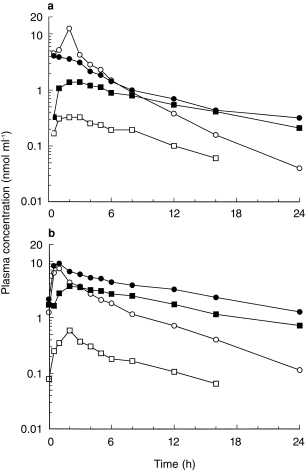

'Plasma concentration-time profiles of R-ketoprofen (○), S-ketoprofen (○), R-ketoprofen glucuronide (□) and S-ketoprofen glucuronide after (). Panel a, single 50 mg oral dose of ketoprofen (n = 6). Panel b, 50 mg ketoprofen oral dose following 8 days of dosing with 50 mg three times daily (n = 6).'

'None (db false positive status)'

'/Users/Ines/ipynbs/fig_info/10583018_PMC2014373_bcp0048-0494-f1.jpeg'

In [22]:
VBox([HBox([previous_button, next_button]), image_slider, space, HBox([decision, keep_button, exclude_button, dont_know_button]), space, status_toggle])

### Check some things in the db

In [27]:
# Check images with certain value
cursor.execute("select distinct pmid, pmcid, fig_id, fal_pos from fig_info where fal_pos is not null ")
len(cursor.fetchall())


29

In [14]:
# Check value for one image
cursor.execute("select distinct pmid, fig_id, caption, fal_pos from fig_info where fig_id = 'bcp0047-0483-f1'")
cursor.fetchall()

[(10336571,
  'bcp0047-0483-f1',
  'Semilogarithmic and linear (insert) plasma concentration-time profiles of single p.o. (mean of two administrations of 12 mg tablet, ) and i.v. (3 mg as an infusion over 40 min, ○) administrations of HTF under fasted conditions (mean+s.e.mean, n=12).',
  0)]

In [15]:
def select_images(selection_dir, img_dir):
    if not os.path.exists(selection_dir):
        os.makedirs(selection_dir)

    cursor.execute("select distinct pmid, pmcid, fig_id, fal_pos from fig_info where fal_pos = 1  ")
    
    for image in cursor.fetchall():
        filename = '_'.join([str(image[0]), image[1], image[2]])
        shutil.copyfile(img_dir+filename+'.jpeg', selection_dir+filename+'.jpeg')
    

In [16]:
#select_images('/Users/Ines/ipynbs/selected_images/', img_dir)

In [17]:
#conn.commit()

In [18]:
#conn.close()